In [1]:
## Group Study 
- Ranveer Singh
- Anindita Das
- Submitted On : 08-06-2022


import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 500)
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# data location
filePath = "../resources/"
filePath = "C:/Users/EASAIND/Desktop/Data_Dictionary.xlsx" 

In [7]:
# read raw files
loanDf = pd.read_csv("C:/Users/EASAIND/Desktop/loan.csv")
loanStatsDf = pd.read_excel("C:/Users/EASAIND/Desktop/Data_Dictionary.xlsx", sheet_name="LoanStats")
rejectStatsDf = pd.read_excel("C:/Users/EASAIND/Desktop/Data_Dictionary.xlsx", sheet_name="RejectStats") 

In [8]:
# Check data load and count
loanDf.head(10) 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,15-Jan,171.62,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,13-Apr,119.66,NaN,13-Sep,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,1-Nov,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,14-Jun,649.91,NaN,16-May,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,15-Jan,357.48,NaN,16-Apr,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [49]:
loanDf.shape 

(39717, 111)

In [10]:
loanDf.nunique().sort_values()

# No need to perfrom remove duplciates 
# Remove empty and single value from DF 

verification_status_joint             0
bc_util                               0
bc_open_to_buy                        0
avg_cur_bal                           0
acc_open_past_24mths                  0
inq_last_12m                          0
total_cu_tl                           0
inq_fi                                0
total_rev_hi_lim                      0
all_util                              0
max_bal_bc                            0
mo_sin_old_il_acct                    0
open_rv_24m                           0
il_util                               0
total_bal_il                          0
mths_since_rcnt_il                    0
open_il_24m                           0
open_il_12m                           0
open_il_6m                            0
open_acc_6m                           0
tot_cur_bal                           0
tot_coll_amt                          0
total_bc_limit                        0
open_rv_12m                           0
mo_sin_old_rev_tl_op                  0


In [11]:
loanDf = loanDf.dropna(axis=1, how="all")
# New shape, 54 columns were having all null values, new shape is
loanDf.shape 

(39717, 57)

In [12]:
pd.set_option('display.max_row', 500)
loanDf.dtypes 

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [13]:
##Goal : Create graphs for bwlow items
# loan_status == 'Charged Off' vs loan_amnt
# loan_status == 'Charged Off' vs emp_length
# loan_status == 'Charged Off' vs annual_inc
# loan_status == 'Charged Off' vs verification_status
# loan_status == 'Charged Off' vs home_ownership
# loan_status == 'Charged Off' vs pymnt_plan
# loan_status == 'Charged Off' vs purpose 

In [14]:
loanDf.loan_status.unique() 

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [15]:
# Keep only "Charged Off" data
loanDf = loanDf[loanDf.loan_status == "Charged Off"] 

In [16]:
## Manipulate data which is required for further charts
loanDf['amnt_groups'] = pd.cut(loanDf['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-300k'])
loanDf['inc_groups'] = pd.cut(loanDf['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loanDf.emp_length.fillna(loanDf.emp_length.mode()[0], inplace = True)
loanDf.emp_length = pd.to_numeric(loanDf.emp_length.apply(lambda x: 0 if "<" in str(x) else (str(x).split('+')[0] if "+" in str(x) else str(x).split()[0]))) 

<AxesSubplot:xlabel='amnt_groups', ylabel='count'>

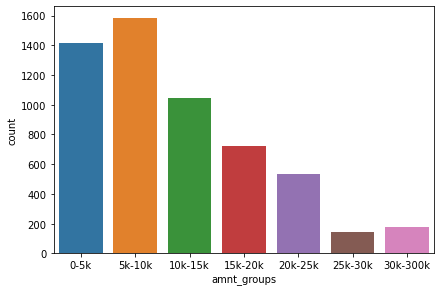

In [17]:
# loan_status == 'Charged Off' vs loan_amnt
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='amnt_groups', data=loanDf[loanDf.loan_status == 'Charged Off']) 

<AxesSubplot:xlabel='emp_length', ylabel='count'>

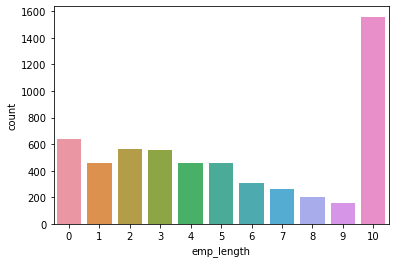

In [18]:
# loan_status == 'Charged Off' vs emp_length
sns.countplot(x='emp_length', data=loanDf[loanDf.loan_status == 'Charged Off']) 

<AxesSubplot:xlabel='inc_groups', ylabel='count'>

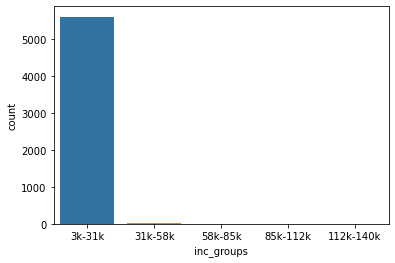

In [19]:
# loan_status == 'Charged Off' vs annual_inc
sns.countplot(x='inc_groups', data=loanDf[loanDf.loan_status == 'Charged Off']) 

<AxesSubplot:xlabel='verification_status', ylabel='count'>

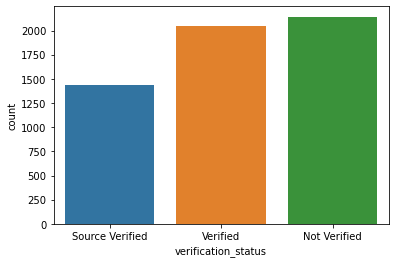

In [20]:
# loan_status == 'Charged Off' vs verification_status
sns.countplot(x='verification_status', data=loanDf[loanDf['loan_status']=='Charged Off']) 

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

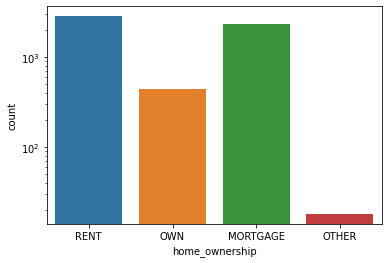

In [21]:
# loan_status == 'Charged Off' vs home_ownership
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loanDf[loanDf['loan_status']=='Charged Off']) 

<AxesSubplot:xlabel='count', ylabel='purpose'>

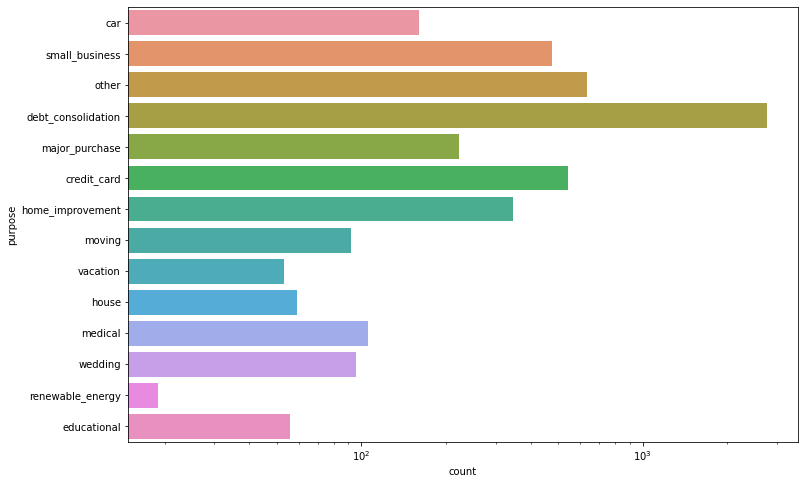

In [22]:
# loan_status == 'Charged Off' vs purpose
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loanDf[loanDf.loan_status == 'Charged Off']) 

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline 

In [30]:
loanDf = pd.read_csv("C:/Users/EASAIND/Desktop/loan.csv")
loanStatsDf = pd.read_excel("C:/Users/EASAIND/Desktop/Data_Dictionary.xlsx", sheet_name="LoanStats")
rejectStatsDf = pd.read_excel("C:/Users/EASAIND/Desktop/Data_Dictionary.xlsx", sheet_name="RejectStats")     

In [24]:
loanDf.head(10)     

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


{'whiskers': [<matplotlib.lines.Line2D at 0x1f725244f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1f72524e4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f725244d60>],
 'medians': [<matplotlib.lines.Line2D at 0x1f72524ea90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f72524ed60>],
 'means': []}

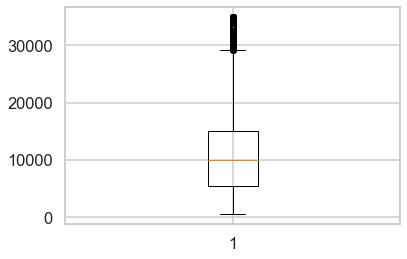

In [44]:
# loan_status == 'Charged Off' vs loan_amnt'
plt.boxplot(loanDf.loan_amnt)        

In [46]:
loanStatsDf.head(10) 

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


In [47]:
rejectStatsDf.head(10) 

,RejectStats File,Description
0,Amount Requested,The total amount requested by the borrower
1,Application Date,The date which the borrower applied
2,Loan Title,The loan title provided by the borrower
3,Risk_Score,"For applications prior to November 5, 2013 the..."
4,Debt-To-Income Ratio,A ratio calculated using the borrower’s total ...
5,Zip Code,The first 3 numbers of the zip code provided b...
6,State,The state provided by the borrower in the loan...
7,Employment Length,Employment length in years. Possible values ar...
8,Policy Code,publicly available policy_code=1\nnew products...


{'whiskers': [<matplotlib.lines.Line2D at 0x1f726724880>,
 'caps': [<matplotlib.lines.Line2D at 0x1f726724e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7267245b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f726729400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f7267296d0>],
 'means': []}

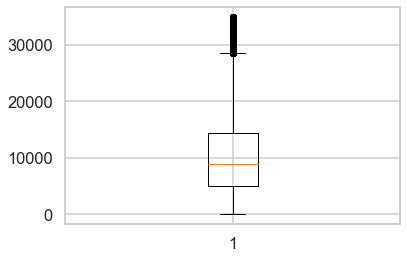

In [48]:
# loan_status == 'Charged Off' vs funded_amnt_inv'
plt.boxplot(loanDf.funded_amnt_inv) 

{'whiskers': [<matplotlib.lines.Line2D at 0x1f726767ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f7267690d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f7267746a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f726769670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f726769940>],
 'means': []}

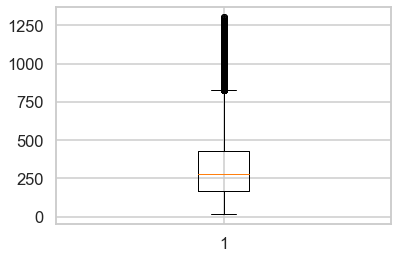

In [51]:
# loan_status == 'Charged Off' vs installment'
plt.boxplot(loanDf.installment)  

{'whiskers': [<matplotlib.lines.Line2D at 0x1f726a48bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f726a5b190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f726a488e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f726a5b730>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f726a5bcd0>],
 'means': [<matplotlib.lines.Line2D at 0x1f726a5ba00>]}

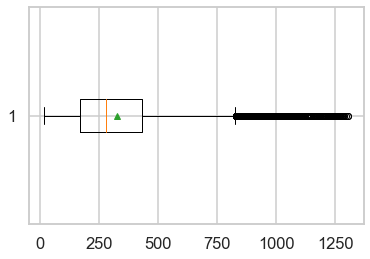

In [59]:
 plt.boxplot(loanDf['installment'],showmeans=True,vert=False)      

{'whiskers': [<matplotlib.lines.Line2D at 0x1f726aaac70>,
 'caps': [<matplotlib.lines.Line2D at 0x1f726aba250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f726aaaac0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f726aba7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f726abad90>],
 'means': [<matplotlib.lines.Line2D at 0x1f726abaac0>]}

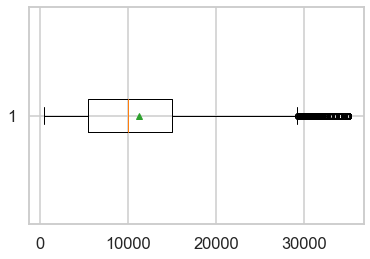

In [60]:
 plt.boxplot(loanDf['loan_amnt'],showmeans=True,vert=False) 

{'whiskers': [<matplotlib.lines.Line2D at 0x1f726b11310>,
 'caps': [<matplotlib.lines.Line2D at 0x1f726b118b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f726b11160>],
 'medians': [<matplotlib.lines.Line2D at 0x1f726b11e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f726b1e160>],
 'means': []}

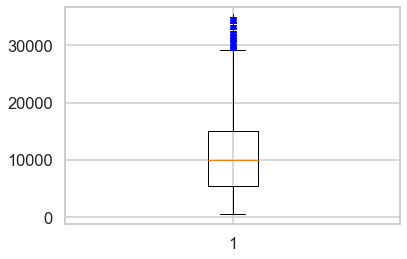

In [61]:
#To change symbol to blue + sign
plt.boxplot(loanDf.loan_amnt,sym='b+') 

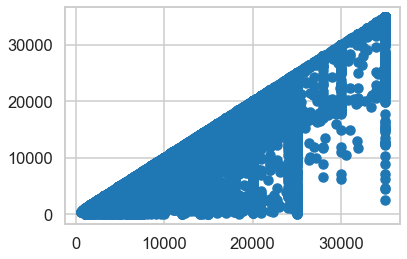

In [62]:
#correlation between loan_amnt and funded_amnt_inv
x = loanDf['loan_amnt']
y = loanDf['funded_amnt_inv']

np.corrcoef(x, y)

plt.scatter(x, y)
plt.show() 

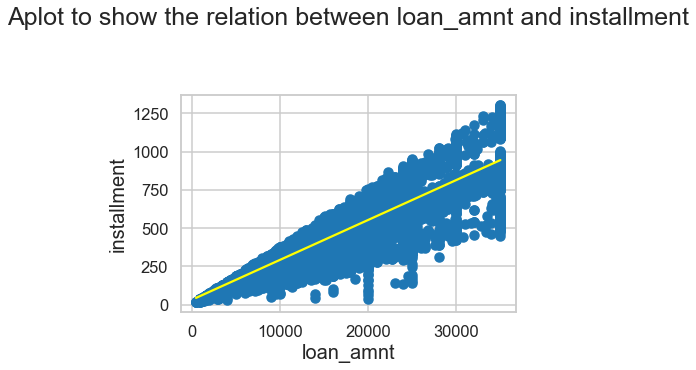

In [71]:
#correlation between loan_amnt and installment
x = loanDf['loan_amnt']
y = loanDf['installment']

np.corrcoef(x, y)

plt.scatter(x, y)
plt.title('Aplot to show the relation between loan_amnt and installment')
plt.xlabel('loan_amnt')
plt.ylabel('installment')
plt.plot(np.unique(x),np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='yellow')
plt.show()          

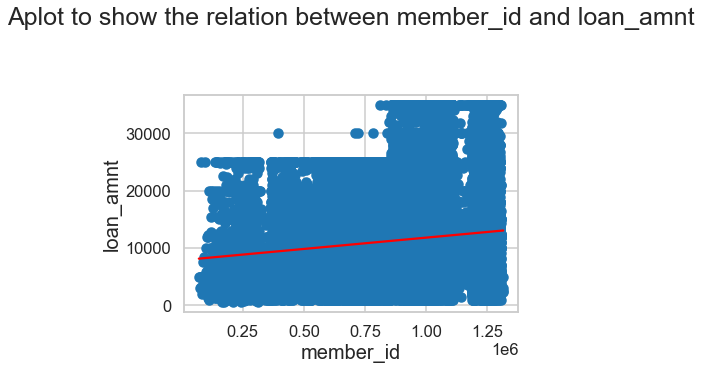

In [75]:
#correlation between member_id and loan_amnt
x = loanDf['member_id']
y = loanDf['loan_amnt']

np.corrcoef(x, y)

plt.scatter(x, y)
plt.title('Aplot to show the relation between member_id and loan_amnt')
plt.xlabel('member_id')
plt.ylabel('loan_amnt')
plt.plot(np.unique(x),np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
plt.show()     

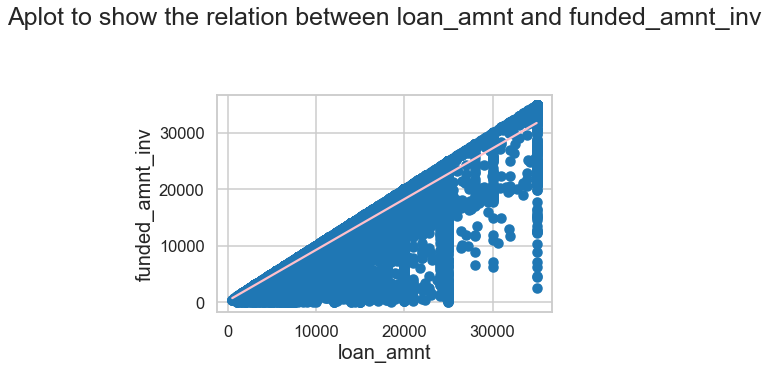

In [78]:
#correlation in briefly between loan_amnt and funded_amnt_inv
x = loanDf['loan_amnt']
y = loanDf['funded_amnt_inv']

np.corrcoef(x, y)

plt.scatter(x, y)
plt.title('Aplot to show the relation between loan_amnt and funded_amnt_inv')
plt.xlabel('loan_amnt')
plt.ylabel('funded_amnt_inv')
plt.plot(np.unique(x),np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='pink')
plt.show()   

In [84]:
#heatmap-correlation loan_amnt vs installment
loanDf.groupby('loan_amnt').installment.value_counts()  

loan_amnt  installment
500        15.69          1
           16.08          1
           16.25          1
           16.31          1
           16.47          1
                         ..
35000      1272.20        1
           1283.50        1
           1295.21        1
           1302.69        1
           1305.19        1
Name: installment, Length: 17457, dtype: int64

In [94]:
loan_installment = (
    loanDf
.groupby('loan_amnt')
.installment
.value_counts()
.unstack()
.fillna(0)
)  

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

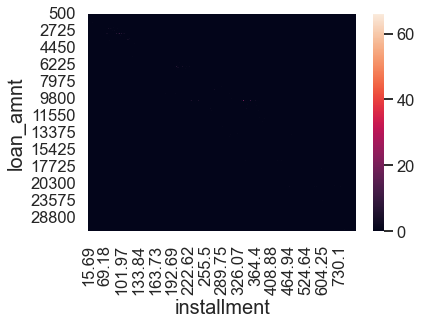

In [99]:
sns.heatmap(loan_installment) 

In [100]:
#heatmap-correlation member_id vs loan_amnt
loanDf.groupby('member_id').loan_amnt.value_counts() 

member_id  loan_amnt
70699      5000         1
73673      3000         1
74724      5000         1
76583      5000         1
80353      3175         1
                       ..
1306957    5600         1
1311441    5000         1
1311748    3000         1
1313524    2400         1
1314167    2500         1
Name: loan_amnt, Length: 39717, dtype: int64

In [101]:
memberid_loanamnt = (
    loanDf
.groupby('member_id')
.loan_amnt
.value_counts()
.unstack()
.fillna(0)
)  

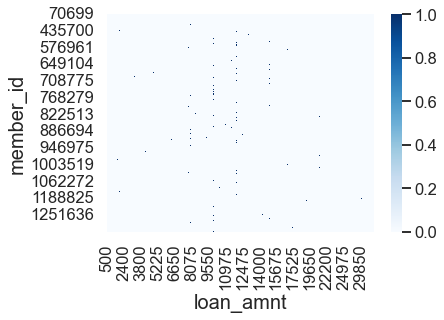

In [105]:
sns.heatmap(memberid_loanamnt, cmap="Blues");     